In [ ]:
import pandas as pd
#used to create data frames
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#accuracy is used to evaluate

In [ ]:
data = pd.read_csv('/content/heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.dtypes


,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
#checking for missing values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# checking the distribution of target variable
data['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
X=data.drop(columns='target',axis=1)
y=data['target']
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (242, 13)
shape of X_test=  (61, 13)
shape of y_train=  (242,)
shape of y_test=  (61,)


In [ ]:
#Model training
model=LogisticRegression()
model

LogisticRegression()

In [ ]:
#training the logistic regression with training data
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#accurcy of training data
X_train_prediction=model.predict(X_train)
#Storing accuray
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8512396694214877


In [ ]:
#Accuracy score
#accurcy of testing data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,y_test)
print('Accuracy on testing data:',testing_data_accuracy)

Accuracy on testing data: 0.819672131147541


In [ ]:
#changing the input _data to a numpy array
input_data1=(57,1,0,140,192,0,1,148,0,0.4,1,0,1)
input_data_numpy_array1=np.asarray(input_data1)

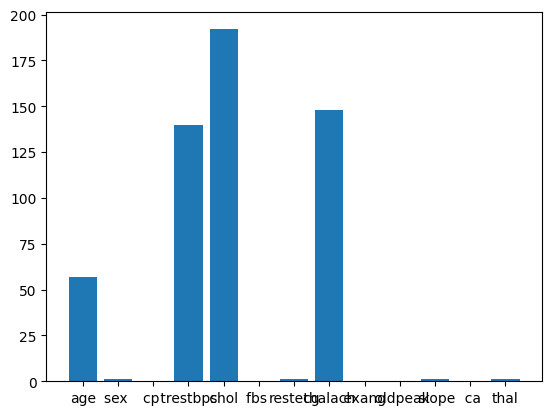

In [ ]:
from matplotlib  import pyplot as plt
import numpy as np
features=["age", "sex ","cp "," trestbps "," chol ", "fbs ","restecg", " thalach "," exang "," oldpeak", " slope","  ca ","thal"]
rates=np.array([57,1,0,140,192,0,1,148,0,0.4,1,0,1]) # we can list directly without using numpy
plt.bar(features,rates)
plt.show()

In [ ]:
 #reshape the np array as we are predicting for one instance
input_data_reshaped1=input_data_numpy_array1.reshape(1,-1)
print(input_data_reshaped1)

[[ 57.    1.    0.  140.  192.    0.    1.  148.    0.    0.4   1.    0.
    1. ]]


In [ ]:
prediction=model.predict(input_data_reshaped1)
print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if(prediction[0]==0):
    print('The machine learning model indicates that the person has higher likelihood of getting heart disease.')
else:
    print('The machine learning model suggests a low likelihood of heart disease')

The machine learning model suggests a low likelihood of heart disease


In [ ]:
input_data2=(51,1,0,140,298,0,1,122,1,4.2,1,3,3)
input_data_numpy_array2=np.asarray(input_data2)

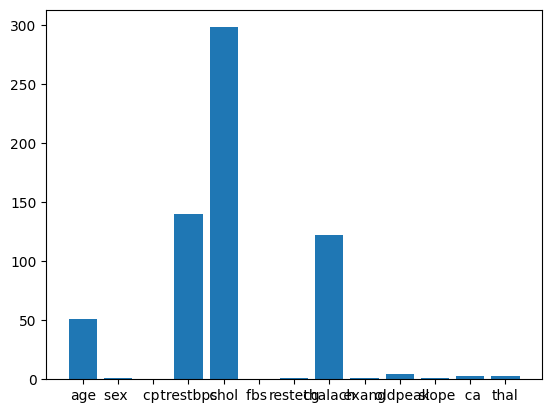

In [ ]:
from matplotlib  import pyplot as plt
import numpy as np
features=["age", "sex ","cp "," trestbps "," chol ", "fbs ","restecg", " thalach "," exang "," oldpeak", " slope","  ca ","thal"]
rates=np.array([51,1,0,140,298,0,1,122,1,4.2,1,3,3]) # we can list directly without using numpy
plt.bar(features,rates)
plt.show()

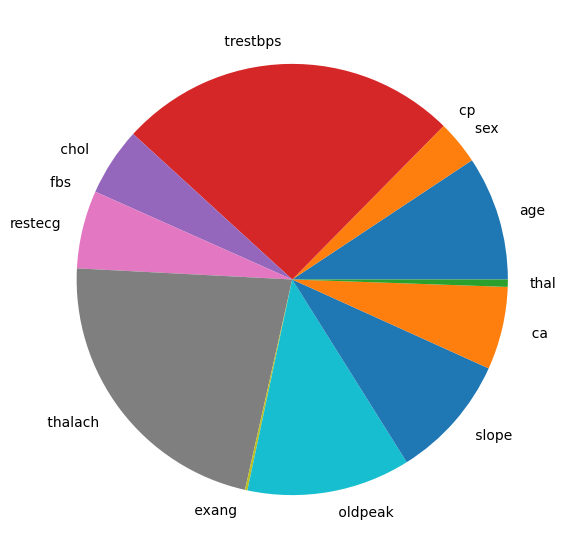

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset

features=["age", "sex ","cp "," trestbps "," chol ", "fbs ","restecg", " thalach "," exang "," oldpeak", " slope","  ca ","thal"]
rates=([51,18,0,140,28,0,32,122,1,67,51,34,3])

# Creating plot
fig = plt.figure(figsize =(10, 7)) #JUST REPRESENT THE SIZE
plt.pie(rates, labels = features)

# show plot
plt.show()

In [ ]:
#reshape the np array as we are predicting for one instance
input_data_reshaped2=input_data_numpy_array2.reshape(1,-1)
input_data_reshaped2

array([[ 51. ,   1. ,   0. , 140. , 298. ,   0. ,   1. , 122. ,   1. ,
          4.2,   1. ,   3. ,   3. ]])

In [ ]:
num_feats = data.select_dtypes(include=np.number).columns.tolist()
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
prediction=model.predict(input_data_reshaped2)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if(prediction[0]==0):
    print('The machine learning model suggests a low likelihood of heart disease')
else:
    print('The machine learning model indicates that the person has higher likelihood of getting heart disease.')

The machine learning model suggests a low likelihood of heart disease


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pickle

In [ ]:
x, y = make_classification(n_samples=1000, n_features=5, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [ ]:
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
print("Model saved as 'heart_model.pkl'")

Model saved as 'heart_model.pkl'


In [1]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [4]:
X_train = [[50, 1, 2, 130, 250], [60, 0, 1, 140, 260]]
y_train = [1, 0]

In [5]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved successfully!")

Model saved successfully!
